In [1]:
!pip install nltk


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import string
import matplotlib.pyplot as plt

In [3]:
# Téléchargement des ressources NLTK nécessaires
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
text = """Customs Duties: A Highly Risky Standoff Between Donald Trump and the Financial Markets
The US president's tariff offensive led to another catastrophic stock market session in Asia and Europe on Monday. While the risk of a crash appears to have been averted for the time being, confidence in the United States, the world's leading economic power, is beginning to be undermined.
A game of chicken... In English, the "game of chicken" consists of two drivers driving into each other, the winner being the one who, impassive, stays the course. The stock market plunge since Thursday, April 3, is similar: on one side, plummeting prices; on the other, an American president who refuses to listen. A very high-risk standoff is taking place between the two, as Monday, April 7, demonstrated once again. After another disastrous stock market session in Asia and Europe, Wall Street had just opened relatively calmly, with indices even beginning to recover slightly. With an angry message on his network, Truth Social, Donald Trump once again sowed panic. "If China does not withdraw its 34% tariff increase [announced by Beijing on Friday as a retaliatory measure] (...) by tomorrow, April 8, 2025, the United States will impose ADDITIONAL tariffs of 50%, effective April 9."""""

In [5]:
# Tokenisation en phrases
sentences = sent_tokenize(text, language='english')
print("=== Phrases tokenisées ===")
for i, sentence in enumerate(sentences, 1):
    print(f"{i}. {sentence}")


=== Phrases tokenisées ===
1. Customs Duties: A Highly Risky Standoff Between Donald Trump and the Financial Markets
The US president's tariff offensive led to another catastrophic stock market session in Asia and Europe on Monday.
2. While the risk of a crash appears to have been averted for the time being, confidence in the United States, the world's leading economic power, is beginning to be undermined.
3. A game of chicken...
4. In English, the "game of chicken" consists of two drivers driving into each other, the winner being the one who, impassive, stays the course.
5. The stock market plunge since Thursday, April 3, is similar: on one side, plummeting prices; on the other, an American president who refuses to listen.
6. A very high-risk standoff is taking place between the two, as Monday, April 7, demonstrated once again.
7. After another disastrous stock market session in Asia and Europe, Wall Street had just opened relatively calmly, with indices even beginning to recover slig

In [6]:
# Tokenisation en mots
words = word_tokenize(text)
print("\n=== Mots tokenisés ===")
print("Nombre total de mots:", len(words))
print("\nAperçu des 10 premiers mots:")
for i, word in enumerate(words[:10], 1):
    print(f"{i}. {word}")


=== Mots tokenisés ===
Nombre total de mots: 251

Aperçu des 10 premiers mots:
1. Customs
2. Duties
3. :
4. A
5. Highly
6. Risky
7. Standoff
8. Between
9. Donald
10. Trump


In [7]:
# Fréquence des mots et visualisation
fdist = FreqDist(words)

print("\n=== 20 mots les plus fréquents ===")
most_common = fdist.most_common(20)
for word, freq in most_common:
    print(f"'{word}' : {freq} occurrences")


=== 20 mots les plus fréquents ===
',' : 22 occurrences
'the' : 12 occurrences
'.' : 8 occurrences
'to' : 5 occurrences
'on' : 5 occurrences
'of' : 5 occurrences
'April' : 4 occurrences
'A' : 3 occurrences
'and' : 3 occurrences
'stock' : 3 occurrences
'market' : 3 occurrences
'in' : 3 occurrences
'is' : 3 occurrences
':' : 2 occurrences
'Donald' : 2 occurrences
'Trump' : 2 occurrences
'The' : 2 occurrences
'president' : 2 occurrences
''s' : 2 occurrences
'tariff' : 2 occurrences


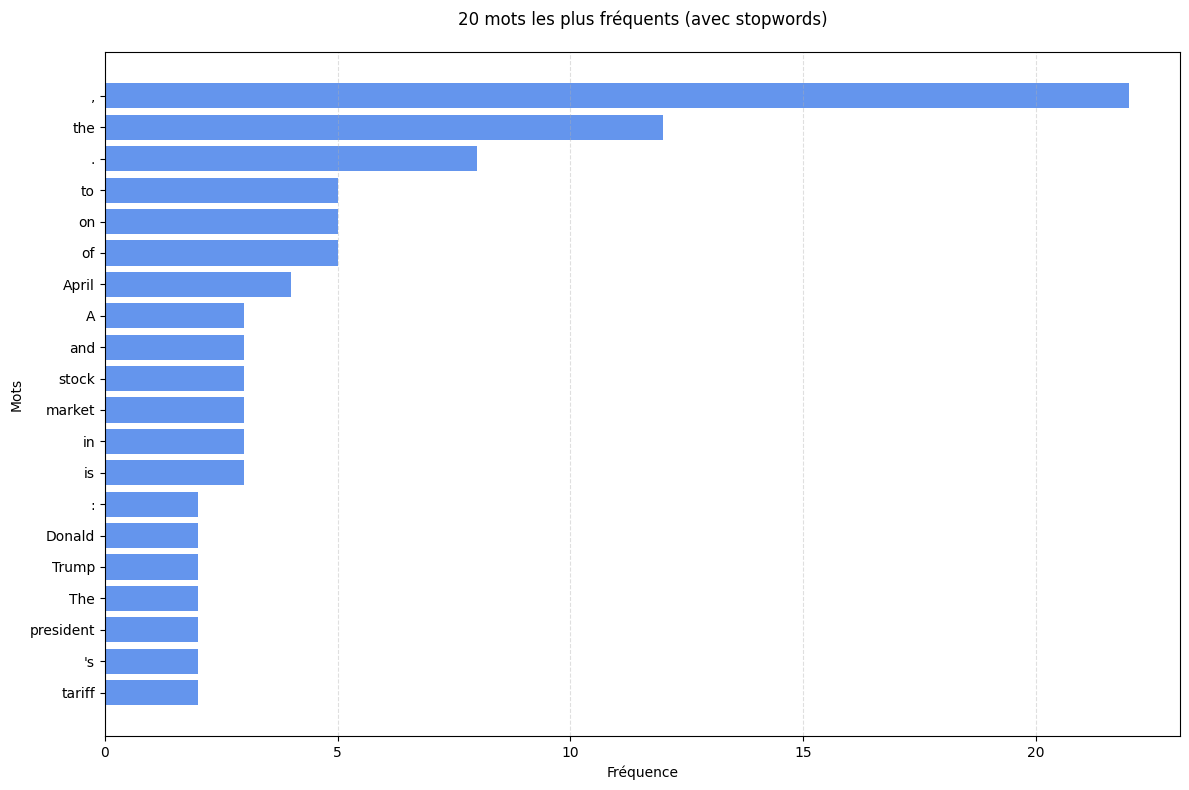

In [8]:
# Obtenir les 20 mots les plus fréquents avec leurs fréquences
most_common = fdist.most_common(20)
words_freq = list(zip(*most_common))

plt.figure(figsize=(12, 8))
plt.barh(words_freq[0], words_freq[1], color='cornflowerblue')
plt.title("20 mots les plus fréquents (avec stopwords)", pad=20)
plt.xlabel("Fréquence")
plt.ylabel("Mots")

# Ajout d'une grille pour une meilleure lisibilité
plt.grid(axis='x', linestyle='--', alpha=0.4)

# Ajustement de la mise en page
plt.tight_layout()

# Inverser l'axe y pour avoir le mot le plus fréquent en haut
plt.gca().invert_yaxis()

plt.show()

In [12]:
# Nettoyage: suppression des stopwords et ponctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

filtered_words = [
    word.lower() for word in words 
    if word.lower() not in stop_words 
    and word not in punctuation 
    and not word.isdigit()
]

# Fréquence des mots nettoyés
fdist_filtered = FreqDist(filtered_words)

print("\n=== 20 mots les plus fréquents après nettoyage ===")
for word, freq in fdist_filtered.most_common(20):
    print(f"'{word}' : {freq} occurrences")


=== 20 mots les plus fréquents après nettoyage ===
'april' : 4 occurrences
'stock' : 3 occurrences
'market' : 3 occurrences
'standoff' : 2 occurrences
'donald' : 2 occurrences
'trump' : 2 occurrences
'president' : 2 occurrences
''s' : 2 occurrences
'tariff' : 2 occurrences
'another' : 2 occurrences
'session' : 2 occurrences
'asia' : 2 occurrences
'europe' : 2 occurrences
'monday' : 2 occurrences
'united' : 2 occurrences
'states' : 2 occurrences
'beginning' : 2 occurrences
'game' : 2 occurrences
'chicken' : 2 occurrences
'...' : 2 occurrences


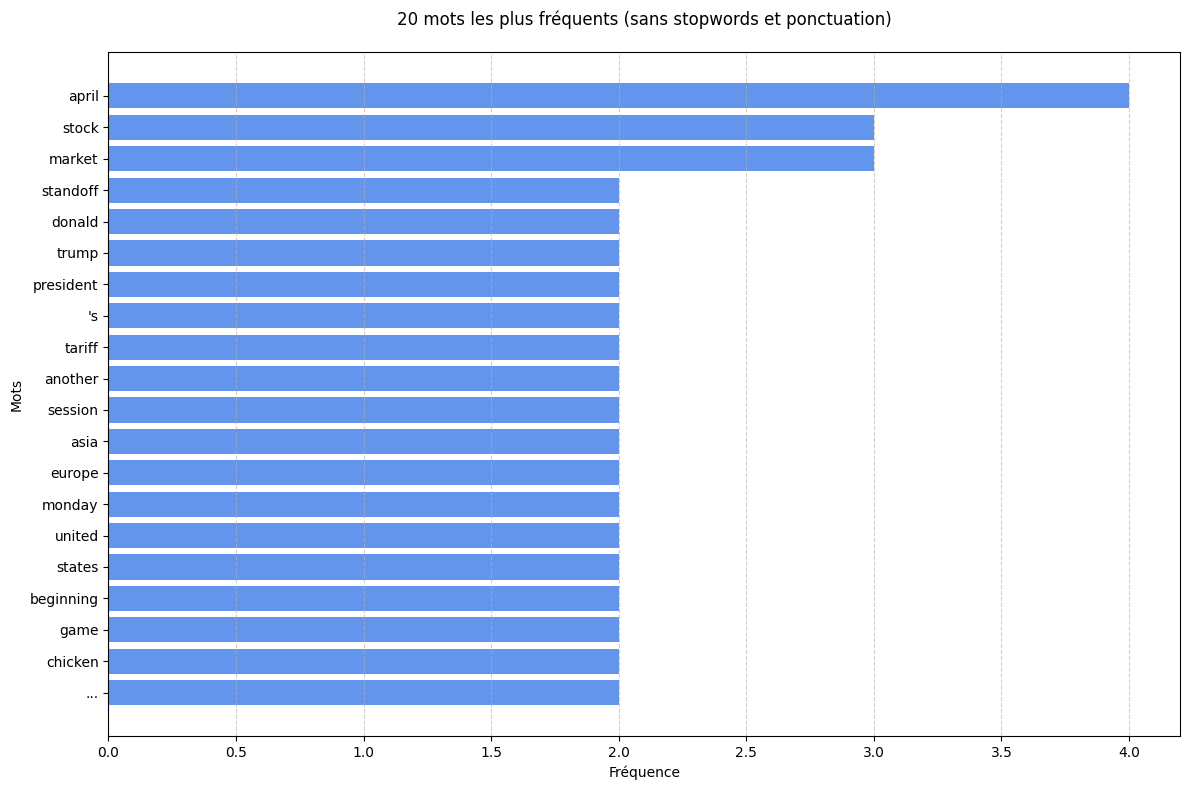

In [10]:
# Obtenir les 20 mots les plus fréquents
most_common = fdist_filtered.most_common(20)
words_freq = list(zip(*most_common))

plt.figure(figsize=(12, 8))
plt.barh(words_freq[0], words_freq[1], color='cornflowerblue')
plt.title("20 mots les plus fréquents (sans stopwords et ponctuation)", pad=20)
plt.xlabel("Fréquence")
plt.ylabel("Mots")

# Ajout d'une grille pour une meilleure lisibilité
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Ajustement de la mise en page
plt.tight_layout()

# Inverser l'axe y pour avoir le mot le plus fréquent en haut
plt.gca().invert_yaxis()

plt.show()